COMP5318 Assignment 2



*Make sure you change the file name with your unikey*


# 1. Data set up


## 1.1 Load Data



In [0]:
#Loading data from google drive
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount("/content/gdrive", force_remount=True)

dataSet_path2="/content/gdrive/My Drive/ML_assignment2/data2.csv"
ICMLA_dataSet = pd.read_csv(dataSet_path2)

Mounted at /content/gdrive


### Preprocessing

In [0]:
#Counting the number of gold clusters
ICMLA_dataSet['session'].value_counts()

Machine Learning Algorithms, Systems and Applications                              5
Real-time Systems and Industry                                                     5
Applications in Security                                                           5
Machine Learning in Visual Information Processing                                  5
Medicine and Bioinformatics                                                        5
Machine Learning I                                                                 5
Ensemble Methods                                                                   5
Neural Network II                                                                  5
Medicine, Science and Music                                                        5
Semi-Supervised Learning                                                           5
Neural Networks I                                                                  5
Feature Extraction and Selection                                 

In [0]:
#Changing the index to paper id
ICMLA_dataSet=ICMLA_dataSet.set_index('paper_id')


In [0]:
#Concatenating the columns for natural language processing
ICLMA_new = []
ICLMA_new= ICMLA_dataSet['paper_title'] + ICMLA_dataSet['author_keywords'] + ICMLA_dataSet['abstract']

In [0]:
#Initialising a tokenise function
import nltk
from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Converting the text data to tfidf vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns; 

### TfidfVectorizer will perform the vectorisation. Please explore the parameters at the user guide
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(ICLMA_new)
print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'tw

(105, 42)




---


# 2. K-means Clustering

In [0]:
import os
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
from PIL import Image
from numpy import asarray
from sklearn.cluster import KMeans

 

### Train K-means clustering

In [0]:
#Training k means clusterer using optimal parameters
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.metrics import v_measure_score, completeness_score
clusterer = KMeansClusterer(30, euclidean_distance, repeats=10)
clusters = clusterer.cluster(tfidf_matrix.toarray(), assign_clusters=True)
vscore = v_measure_score(ICMLA_dataSet['session'], clusters)
compscore = completeness_score(ICMLA_dataSet['session'], clusters)
print('V score is:',vscore)
print('Completeness score',compscore)

V score is: 0.6002231913634907
Completeness score 0.5928838431189908


### First evaluation

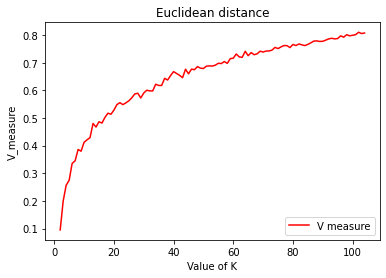

In [0]:
# Performing evaluation with euclidean distance (V measure)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.metrics import v_measure_score, completeness_score
scores = []
k1 = []
for k in range(2,105):
  k1.append(k)
  clusterer = KMeansClusterer(k, euclidean_distance, repeats=10)
  clusters = clusterer.cluster(tfidf_matrix.toarray(), assign_clusters=True)
  score = v_measure_score(ICMLA_dataSet['session'], clusters)
  scores.append(score)

plt.plot(k1, [s for s in scores], 'r', label='V measure')
plt.xlabel('Value of K')
plt.ylabel('V_measure')
plt.title('Euclidean distance')
plt.legend(loc=4)
plt.show()

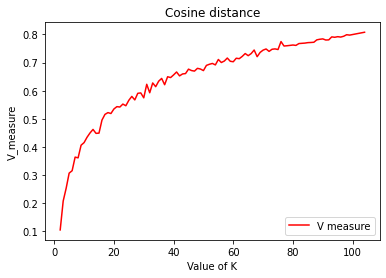

In [0]:
# Performing evaluation with cosine distance (V measure)
scores = []
k1 = []
for k in range(2,105):
  k1.append(k)
  clusterer = KMeansClusterer(k, cosine_distance, repeats=10)
  clusters = clusterer.cluster(tfidf_matrix.toarray(), assign_clusters=True)
  score = v_measure_score(ICMLA_dataSet['session'], clusters)
  scores.append(score)

plt.plot(k1, [s for s in scores], 'r', label='V measure')
plt.xlabel('Value of K')
plt.ylabel('V_measure')
plt.title('Cosine distance')
plt.legend(loc=4)
plt.show()

### Second evaluation 

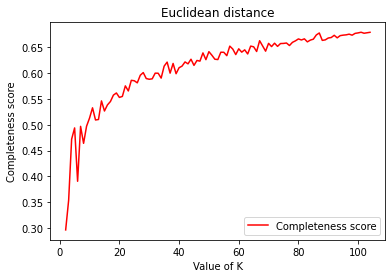

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score
# Performing evaluation with euclidean distance (Completeness score)
scores = []
k1 = []
for k in range(2,105):
  k1.append(k)
  clusterer = KMeansClusterer(k, euclidean_distance, repeats=10)
  clusters = clusterer.cluster(tfidf_matrix.toarray(), assign_clusters=True)
  score = completeness_score(ICMLA_dataSet['session'], clusters)
  scores.append(score)

plt.plot(k1, [s for s in scores], 'r', label='Completeness score')
plt.xlabel('Value of K')
plt.ylabel('Completeness score')
plt.title('Euclidean distance')
plt.legend(loc=4)
plt.show()

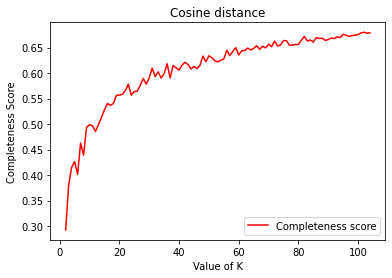

In [0]:
# Performing evaluation with cosine distance (Completeness score)
scores = []
k1 = []
for k in range(2,105):
  k1.append(k)
  clusterer = KMeansClusterer(k, cosine_distance, repeats=10)
  clusters = clusterer.cluster(tfidf_matrix.toarray(), assign_clusters=True)
  score = completeness_score(ICMLA_dataSet['session'], clusters)
  scores.append(score)

plt.plot(k1, [s for s in scores], 'r', label='Completeness score')
plt.xlabel('Value of K')
plt.ylabel('Completeness Score')
plt.title('Cosine distance')
plt.legend(loc=4)
plt.show()



---


# 3. Hierachical Clustering

### Train Hierarchical clustering 

In [0]:
#Importing packages
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import complete, dendrogram, average, single, linkage, cut_tree
from sklearn.metrics import v_measure_score, fowlkes_mallows_score
dist_euclidean = euclidean_distances(tfidf_matrix)
dist_cosine = cosine_distances(tfidf_matrix)
dist_manhattan = manhattan_distances(tfidf_matrix)

In [0]:
#Training heirarichal cluster with optimal parameters
mergings = complete(dist_euclidean)
predict = cut_tree(mergings)[-1]
vscore = v_measure_score(ICMLA_dataSet['session'], predict)
fmscore = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print('V score is:',vscore)
print('Fowlkes mallows score is:',fmscore)

V score is: 0.8071313831195676
Fowlkes mallows score is: 0.40000150122819234


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


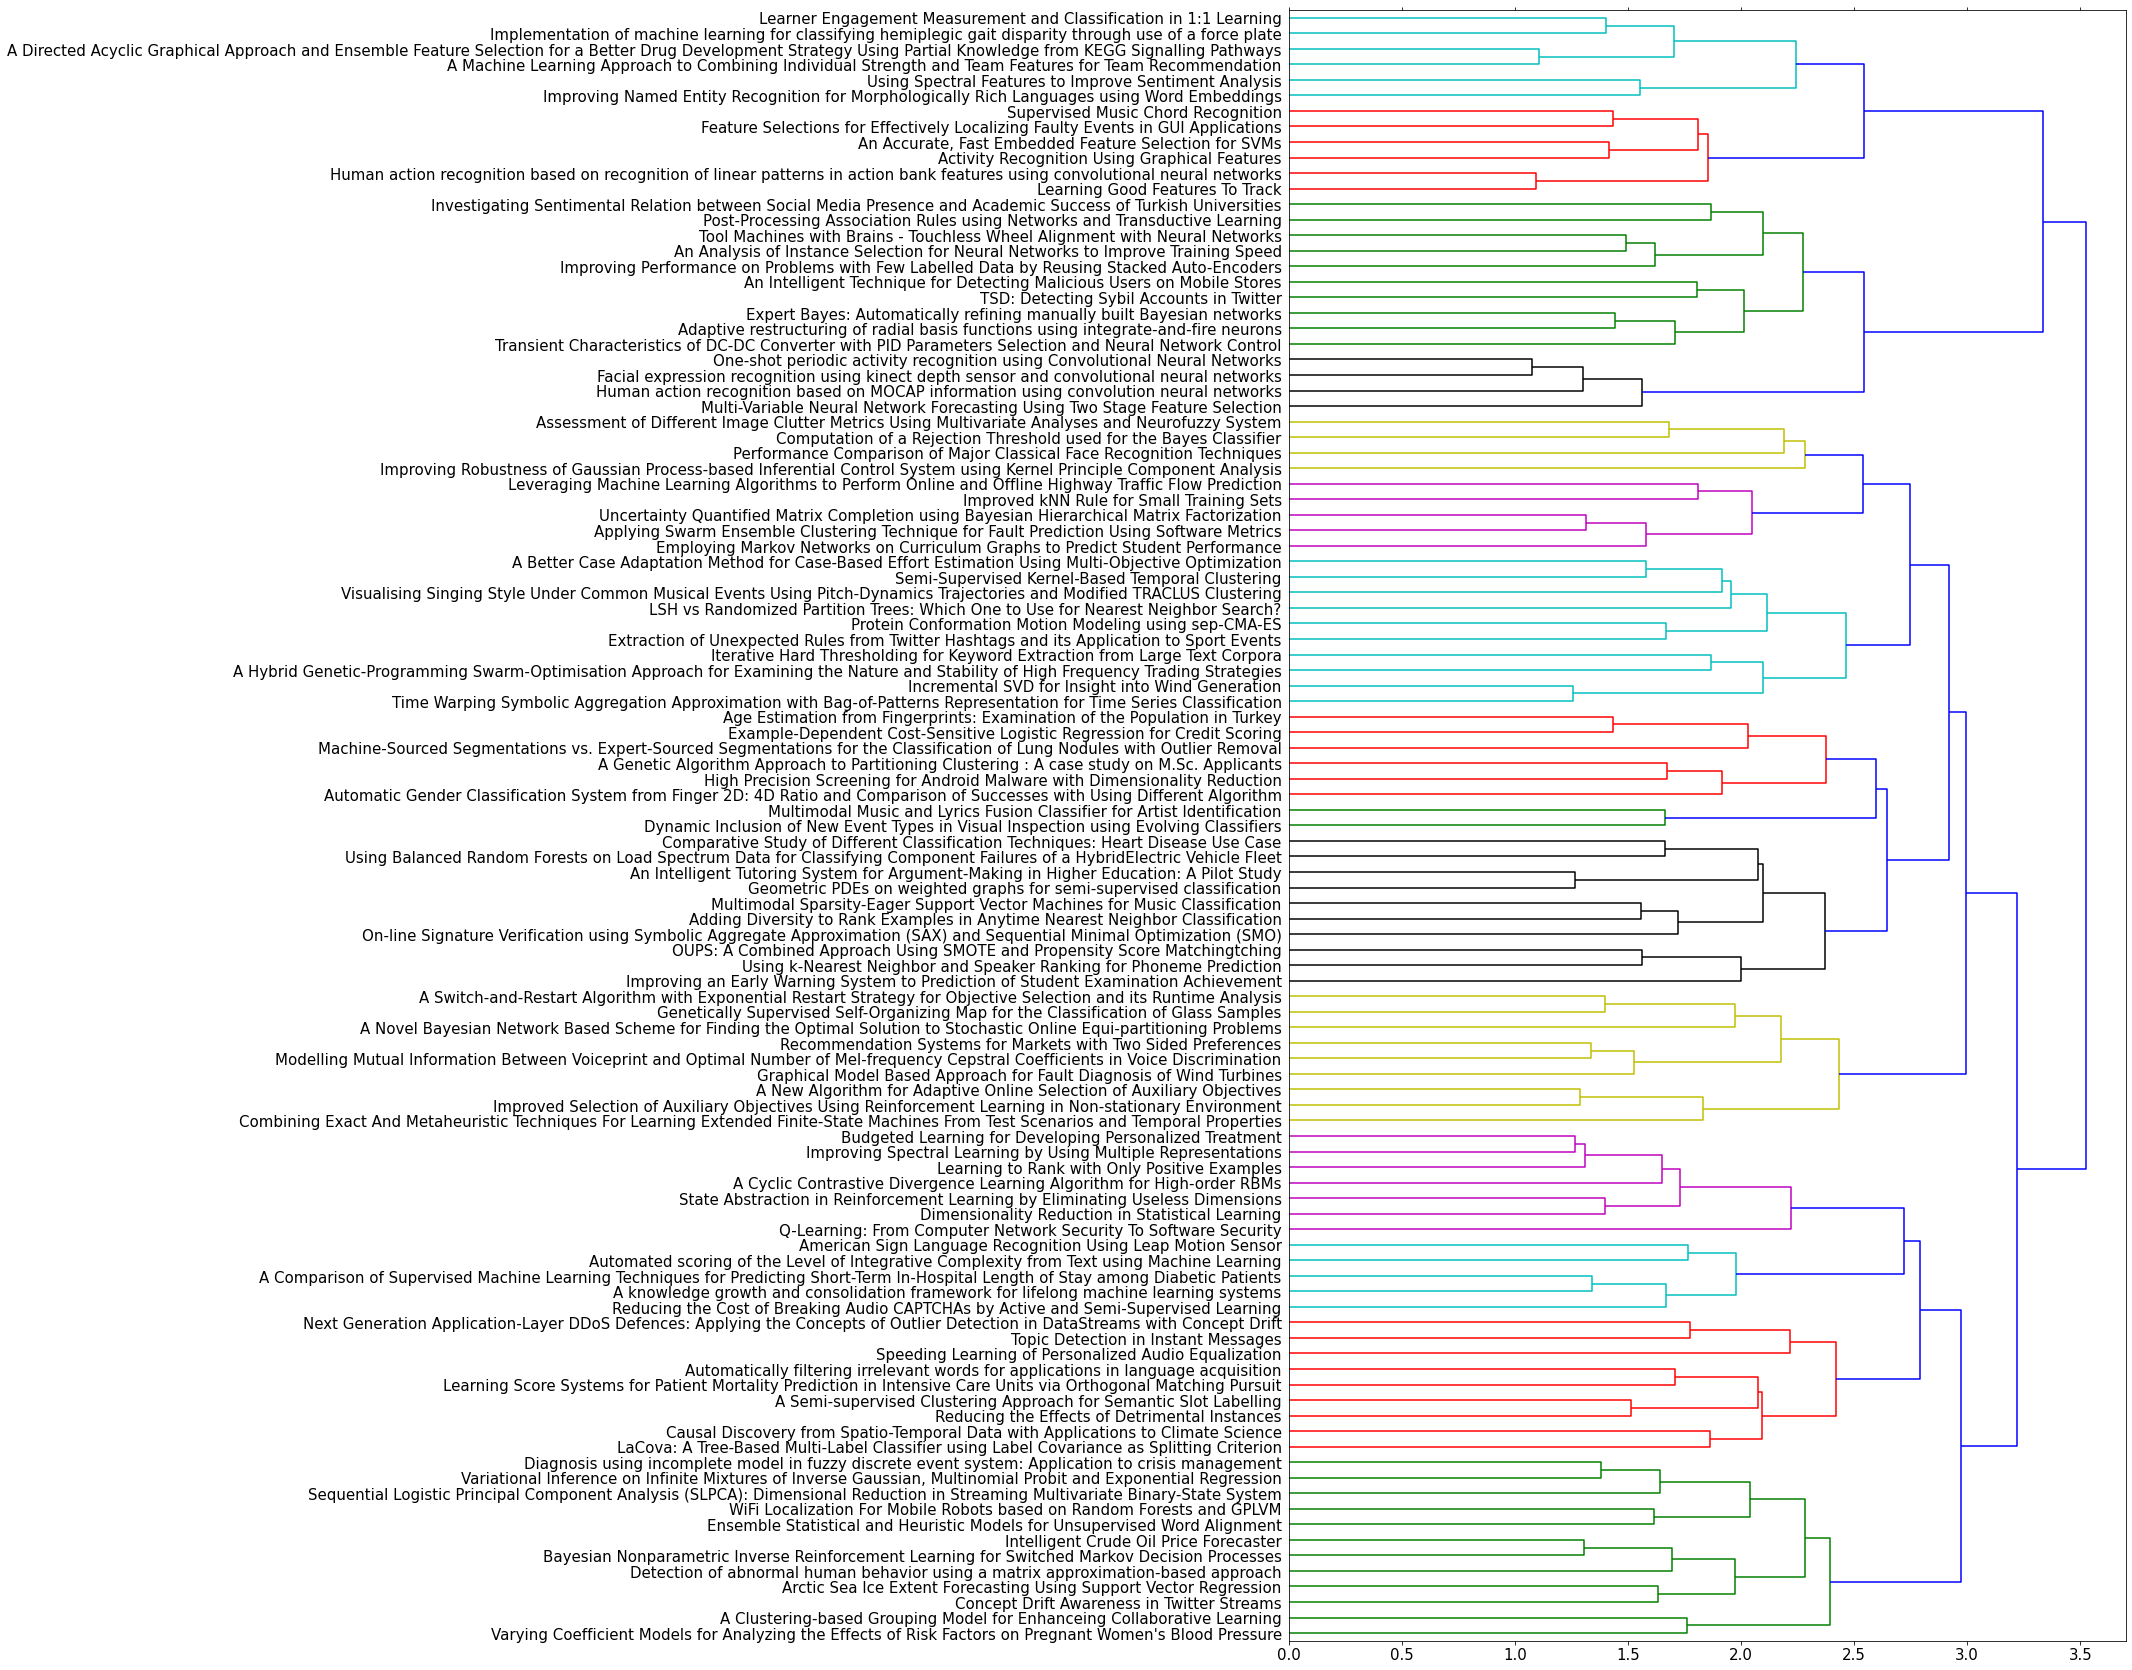

In [0]:
fig, ax = plt.subplots(figsize=(15, 30)) # set size
ax = dendrogram(mergings, orientation="right",labels=np.array(ICMLA_dataSet['paper_title']));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

### First evaluation

In [0]:
#Performing evaluation packages for V measure and fowlkes mallows
from scipy.cluster.hierarchy import complete, dendrogram, average, single, linkage, cut_tree
from sklearn.metrics import v_measure_score, fowlkes_mallows_score
v_score = {'single':{},'average':{},'complete':{}}
fm_score = {'single':{},'average':{},'complete':{}}

In [0]:
#Single linkage with Euclidean distance
mergings = single(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['single']['euclidean'] = score

0.7482850310117635


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Single linkage with Cosine distance
mergings = single(dist_cosine)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['single']['cosine'] = score

0.7821520329270926


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Single linkage with Manhattan distance
mergings = single(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['single']['manhattan'] = score

0.7243179252044626


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Average linkage with Euclidean distance
mergings = average(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['average']['euclidean'] = score

0.7252349375441777


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Average linkage with Cosine distance
mergings = average(dist_cosine)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['average']['cosine'] = score

0.7344907273111663


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Average linkage with Manhattan distance
mergings = average(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['average']['manhattan'] = score

0.7846201857720094


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Complete linkage with Euclidean distance
mergings = complete(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['complete']['euclidean'] = score

0.8071313831195676


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
#Complete linkage with Cosine distance
mergings = complete(dist_cosine)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['complete']['cosine'] = score

0.7512880476071863


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
#Complete linkage with Manhattan distance
mergings = complete(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = v_measure_score(ICMLA_dataSet['session'], predict)
print(score)
v_score['complete']['manhattan'] = score

0.7963054636282323


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
vscore = pd.DataFrame()
vscore.from_dict(v_score)

,single,average,complete
euclidean,0.748285,0.725235,0.807131
cosine,0.782152,0.734491,0.751288
manhattan,0.724318,0.784620,0.796305


### Second evalaution 

In [0]:
#Performing evaluation with fowlkes mallows score
#Single linkage with Euclidean distance
mergings = single(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['single']['euclidean'] = score

0.4093945039292425


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Single linkage with Cosine distance
mergings = single(dist_cosine)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['single']['cosine'] = score

0.416978171910617


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Single linkage with Manhattan distance
mergings = single(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['single']['manhattan'] = score


0.31957014237185505


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [0]:
#Average linkage with Euclidean distance
mergings = average(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['average']['euclidean'] = score

0.3696595063799828


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Average linkage with Cosine distance
mergings = average(dist_cosine)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['average']['cosine'] = score

0.3441848169246022


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Average linkage with Manhattan distance
mergings = average(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['average']['manhattan'] = score

0.3852789129628991


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [0]:
#Complete linkage with Euclidean distance
mergings = complete(dist_euclidean)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['complete']['euclidean'] = score

0.40000150122819234


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
#Complete linkage with Cosine distance
mergings = complete(dist_cosine)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['complete']['cosine'] = score

0.36087114899222555


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
#Complete linkage with Manhattan distance
mergings = complete(dist_manhattan)
predict = cut_tree(mergings)[-1]
score = fowlkes_mallows_score(ICMLA_dataSet['session'], predict)
print(score)
fm_score['complete']['manhattan'] = score

0.39677335073732123


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


In [0]:
fmscore = pd.DataFrame()
fmscore.from_dict(fm_score)

,single,average,complete
euclidean,0.409395,0.369660,0.400002
cosine,0.416978,0.344185,0.360871
manhattan,0.319570,0.385279,0.396773
